<a href="https://colab.research.google.com/github/ashraf-badalov/ml-projects/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [39]:
class LinearRegression:

  def __init__(self, lr = 0.1, n_iters = 1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias

      dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
      db = (1/n_samples) * np.sum(y_pred - y)

      self.weights = self.weights - self.lr * dw
      self.bias = self.bias - self.lr * db

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias

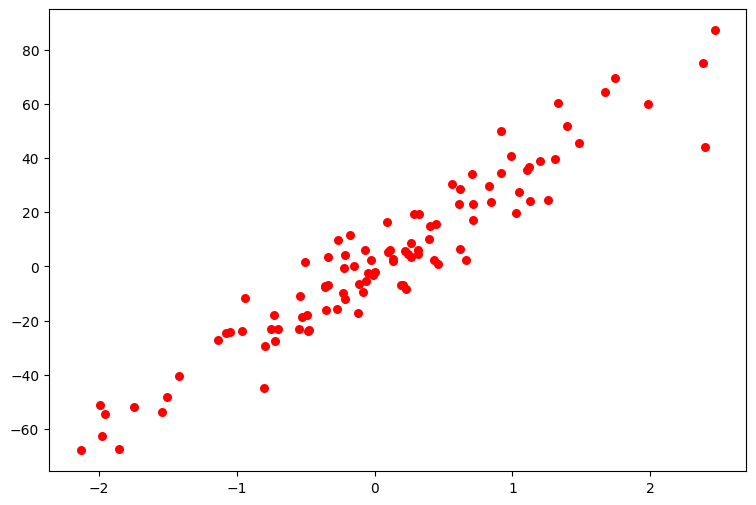

In [52]:
X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 10, random_state = 10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
fig = plt.figure(figsize = (9,6))
plt.scatter(X[:, 0], y, color = 'r', marker='o', s=30)
plt.show()

In [46]:
reg = LinearRegression(lr = 0.1)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

mse = np.mean((predictions - y_test)**2)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 55.319432909848786


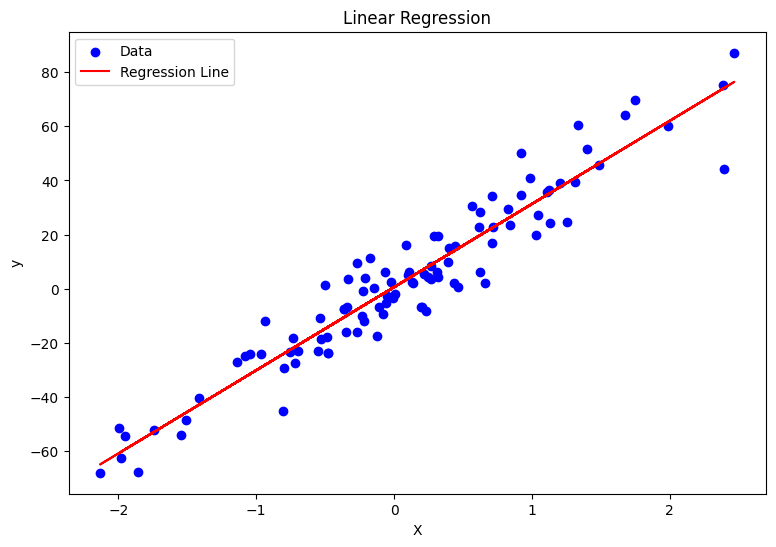

In [58]:
plt.figure(figsize=(9,6))
plt.scatter(X, y, color='blue', label='Data')
y_pred = reg.predict(X)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()